# Multi-Variable Linear Regession

## Introduction

In this example, we will implement linear regression with multiple variables to predict the prices of houses.

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing
prices.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

    NOTE: The example and sample data is being taken from the "Machine Learning course by Andrew Ng" in Coursera.

In [1]:
# initial imports
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
import seaborn as sns

# setting graph properties
plt.rcParams['figure.dpi'] = 300  # setting figure dpi for better quality graphs
plt.rcParams['figure.figsize'] = [10,8]
sns.set(context="notebook", style="white")  # graph styling using seaborn
%config InlineBackend.figure_format = 'svg'

In [2]:
# imports from my models designed for these examples
from models.linear_regression import compute_cost, gradient_descent, compute_gradient, normal_equation
from models.data_preprocessing import add_bias_unit, feature_normalize

## Loading and Displaying Data

In [3]:
print('Loading data ...')

data = np.loadtxt('data/ex1data2.txt', delimiter=',')
X = data[:, :-1]  # 47x2
y = data[:, -1, None]  # 47x1
m = y.size  # 47

# printing first 5 elements
with np.printoptions(precision=2, floatmode='fixed', suppress=True, linewidth=150):
    print(np.array(['House size', 'No. of bedrooms']))
    print(X[:5, :])

Loading data ...
['House size' 'No. of bedrooms']
[[2104.00    3.00]
 [1600.00    3.00]
 [2400.00    3.00]
 [1416.00    2.00]
 [3000.00    4.00]]


## Feature Normalization

By looking at the values, note that house sizes are about
1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

The feature normalize function implements:
- Subtraction of the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min).

For example, inside feature_normalize, the quantity X(:,1) contains all the values of $x_{1}$ (house sizes) in the training
set, so np.std(X(:,1)) computes the standard deviation of the house sizes.

At the time that feature_normalize function is called, the extra column of 1’s corresponding to $x_{0} = 1$ has not yet been added to X.

**Implementation Note: When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.**

In [4]:
# ----------------Feature Normalization -----------------
print("Normalizing the features")

X, mu, sigma = feature_normalize(X)
# mu is the mean value
# sigma is the standard deviation

# adding intercept term to X
X = add_bias_unit(X)

# Printing first 5 normalized data points
with np.printoptions(precision=2, floatmode='fixed', suppress=True, linewidth=150):
    print(np.array(['House size', 'No. of bedrooms']))
    print(X[:5, :])

Normalizing the features
['House size' 'No. of bedrooms']
[[ 1.00  0.13 -0.23]
 [ 1.00 -0.51 -0.23]
 [ 1.00  0.51 -0.23]
 [ 1.00 -0.74 -1.55]
 [ 1.00  1.27  1.10]]


**Note: the intercept term $x_{0} = 1$ is not normalized**

## Gradient Descent

Previously, we implemented gradient descent on a univariate regression problem. The only difference in a univariate and multi-variate linear regression gradient descent is that there is one or more than one feature in the multi-variate data matrix X. The hypothesis function and the batch gradient descent update
rule remain unchanged.

### Update equation

The objective of linear regression is to minimize the cost function:

$$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m} \left( h_{\theta}\left( x^{(i)} \right) - y^{(i)} \right) ^{2} $$

where the hypothesis $h_{\theta}(x)$ is given by the linear model :
$$ 
h_{\theta}(x) = \theta^{T}x = \theta_{0} + \theta_{1}x_{1}
$$

the parameters of our model are the $\theta_{j}$ values. These are the values we will adjust to minimize cost J(θ). One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update 

$
\theta_{j} := \theta_{j} - \alpha \frac{1}{m} \sum_{i=1}^{m} \left(h_{\theta} \left(x^{(i)}\right) -y^{(i)}\right)x^{(i)}_{j}$  (simultaneously update $\theta_{j}$ for all j)  

With each step of gradient descent, our parameters $\theta_{j}$ come closer to the
optimal values that will achieve the lowest cost J(θ).

## Implementation Note

In the multivariate case, the cost function can also be written in the folowing vectorized form:

$$
J(\theta) = \frac{1}{2m} \left( X\theta - \vec{y} \right)^{T} \left( X\theta - \vec{y} \right)
$$

where, 
$$
X = \begin{bmatrix} \dots & \left( x^{(1)} \right)^{T}  & \dots \\
\dots & \left( x^{(2)} \right)^{T} & \dots \\
& \vdots & \\ 
\dots & \left( x^{(m)} \right)^{T} & \dots \end{bmatrix} \space\space\space\space\space \vec{y} = \begin{bmatrix} y^{1} \\ y^{2} \\ \vdots \\ y^{m} \end{bmatrix}
$$

The vectorized version is efficient when you’re working with numerical
computing tools like Octave/MATLAB/NUMPY. If you are an expert with matrix
operations, you can prove to yourself that the two forms are equivalent.

Running gradient descent ...
Obtained theta is: [340410.91897274 109162.68848142  -6293.24735132]


Text(0.5, 1.0, 'Covariance Graph with appropriate learning rate')

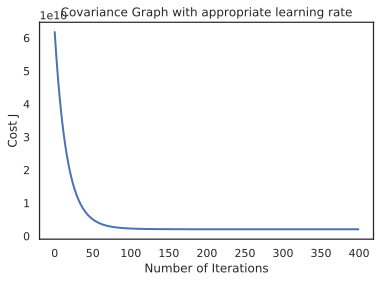

In [5]:
print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400

# Init Theta and Run Gradient Descent
initial_theta = np.zeros((X.shape[1], 1))
theta, J_history = gradient_descent(X, y, initial_theta, alpha, num_iters)

print("Obtained theta is: {}".format(theta.ravel()))

# Covariance Graph with appropriate learning rate
plt.plot(range(J_history.size), J_history, lw=2)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost J")
plt.title("Covariance Graph with appropriate learning rate")

## Selecting Learning Rates

In this part of the exercise, you will get to try out different learning rates for
the dataset and find a learning rate that converges quickly. 

The next phase we are going to call our gradient_descent function and run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of J(θ) values in a vector J_history. After the last iteration, we are going to plot the J values against the number of the iterations.

Note: If your graph looks very different, especially if your value of J(θ)
increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate α on a log-scale, at multiplicative
steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on).
You may also want to adjust the number of iterations you are running if that
will help you see the overall trend in the curve.

Text(0, 0.5, 'Cost J')

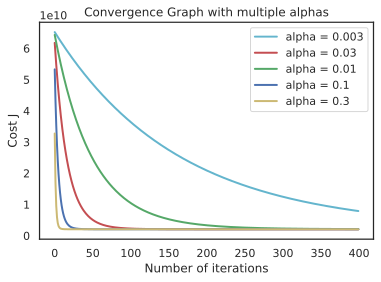

In [6]:
# runnning gradient descend with different alphas
theta1, J_history1 = gradient_descent(X, y, initial_theta, 0.01, num_iters)
theta2, J_history2 = gradient_descent(X, y, initial_theta, 0.1, num_iters)
theta3, J_history3 = gradient_descent(X, y, initial_theta, 0.3, num_iters)
theta4, J_history4 = gradient_descent(X, y, initial_theta, 0.003, num_iters)

# Plot the convergence graph
fig = plt.figure("Covariance Graph")
ax = fig.subplots()
ax.set_title("Convergence Graph with multiple alphas")
ax.plot(range(J_history4.size), J_history4, lw=2,c='c', label="alpha = 0.003")
ax.plot(range(J_history.size), J_history, lw=2, c='r', label="alpha = 0.03")
ax.plot(range(J_history1.size), J_history1, lw=2, c='g' , label="alpha = 0.01")
ax.plot(range(J_history2.size), J_history2, lw=2, c='b',  label="alpha = 0.1")
ax.plot(range(J_history3.size), J_history3, lw=2, c='y',  label="alpha = 0.3")

ax.legend()
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost J')

Notice the changes in the convergence curves as the learning rate changes.
With a small learning rate, you should find that gradient descent takes a very
long time to converge to the optimal value. Conversely, with a large learning
rate, gradient descent might not converge or might even diverge!

In [7]:
# Display gradient descent's result
print('Theta computed from gradient descent: ')
print(theta.ravel())

# Estimate the price of a 1650 sq-ft, 3 br house

test_data = np.array([1650,3]).reshape(1, 2)
test_data, _, __ = feature_normalize(test_data, mu, sigma)
test_data = add_bias_unit(test_data)
price = test_data.dot(theta)
# ============================================================

print('\nPredicted price of a 1650 sq-ft, 3 br house (using gradient descent): {:.2f}'.format(price[0,0]))

Theta computed from gradient descent: 
[340410.91897274 109162.68848142  -6293.24735132]

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 293142.43


## Extra (Normal Equation):

In **Normal Equation** method, we will minimize J by explicitly taking its derivatives with respect to $\theta_{j}$'s amd setting them to zero. This allows us to find the optimum theta withut iterations.

In case of small datasets it is preferable to use normal equation to find the minimum theta values.

Key feature of Normal Equation are:
- No need to choose learning rate alpha.
- No need of iterations.
- better option when the number of features is small.
- No need of feature scaling or normalization.

The vectorized formula for normal equation is:

$$ \theta = \left( X^{T}X \right)^{-1}X^{T}\vec{y}$$

where:
$X^{T}$ is the transpose of matrix X.

Note: the X matrix should contain the $x_{0} = 1$ bias unit in each data point.

In [8]:
# ================Normal Equations ================

print('Loading data ...')

data = np.loadtxt('data/ex1data2.txt', delimiter=',')
X = data[:, :-1]  # 47x2
y = data[:, -1, None]  # 47x1
m = y.size  # 47

# adding bias unit to data
X = add_bias_unit(X)

print('Solving with normal equations...')

# Calculate the parameters from the normal equation
theta_norm = normal_equation(X, y)

# Display normal equation's result
print('Theta computed from the normal equations: ')
print(theta_norm.ravel())

# Estimate the price of a 1650 sq-ft, 3 br house
test_data1 = np.array([1650,3]).reshape(1, 2)
test_data1 = add_bias_unit(test_data1)
price_norm = test_data1.dot(theta_norm)

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): {:.2f}'.format(price_norm[0,0]))

Loading data ...
Solving with normal equations...
Theta computed from the normal equations: 
[89597.9095428    139.21067402 -8738.01911233]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): 293081.46
